### Program 8:

#### Objective: 
Implement a Recurrent Neural Network(RNN) using the PyTorch framework.

Tasks:
- Definean RNN classifier to make predictions on a synthetic time series dataset.
- Train the classifier using suitable criterion and optimizer.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

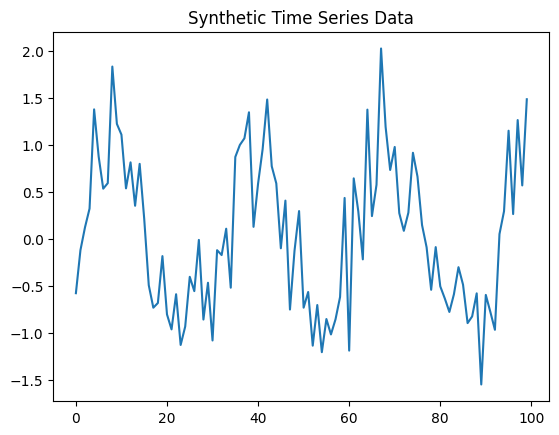

In [2]:
# Generate synthetic time series data
def generate_data():
    t = np.linspace(0, 20, 100)
    y = np.sin(t) + np.random.normal(scale=0.5, size=t.shape)
    return y


data = generate_data()
plt.plot(data)
plt.title("Synthetic Time Series Data")
plt.show()

In [3]:
# Prepare the dataset
def create_inout_sequences(input_data, tw):  # tw -> time step window
    inout_seq = []
    L = len(input_data)
    for i in range(L - tw):
        train_seq = input_data[i : i + tw]
        train_label = input_data[i + tw : i + tw + 1]
        inout_seq.append((train_seq, train_label))
    return inout_seq


seq_length = 10
data = torch.FloatTensor(data).view(-1)
sequences = create_inout_sequences(data, seq_length)

In [4]:
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super(RNN, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.rnn = nn.RNN(input_size, hidden_layer_size, num_layers=1, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        rnn_out, hidden = self.rnn(input_seq.view(len(input_seq), 1, -1))
        predictions = self.linear(rnn_out.view(len(input_seq), -1))
        return predictions[-1]

In [5]:
model = RNN()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 100
for i in range(epochs):
    for seq, labels in sequences:
        optimizer.zero_grad()
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
    if i % 10 == 0:
        print(f"Epoch {i} loss: {single_loss.item()}")

with torch.no_grad():
    preds = []
    for seq, _ in sequences:
        preds.append(model(seq).item())

Epoch 0 loss: 1.29740309715271
Epoch 10 loss: 1.141292929649353
Epoch 20 loss: 1.1023952960968018
Epoch 30 loss: 2.260702133178711
Epoch 40 loss: 0.9879366159439087
Epoch 50 loss: 0.9463108777999878
Epoch 60 loss: 0.9322943091392517
Epoch 70 loss: 0.9544200897216797
Epoch 80 loss: 0.9151090383529663
Epoch 90 loss: 0.9232285022735596


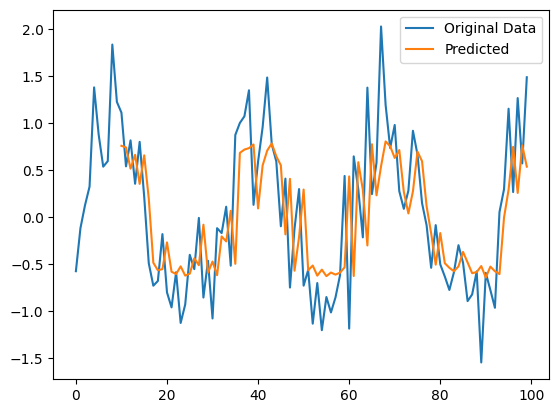

In [6]:
plt.plot(data.numpy(), label='Original Data')
plt.plot(np.arange(seq_length, seq_length + len(preds)), preds, label='Predicted')
plt.legend()
plt.show()